# Cross-Country Comparison — Solar Data (Benin, Sierra Leone, Togo)

This notebook compares cleaned solar datasets across three West African countries to identify 
which site offers the strongest potential for solar energy generation.

We will compare core solar radiation metrics (GHI, DNI, DHI) using summary statistics, boxplots, 
and statistical tests to detect significant differences across regions.


## 2. Setup

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal


## 3. Load Cleaned Data

In [7]:

benin = pd.read_csv('../data/benin_clean.csv')
sierra = pd.read_csv('../data/sierraleone-bumbuna_clean.csv')
togo = pd.read_csv('../data/togo-dapaong_qc_clean.csv')

# Add country labels
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all into one DataFrame
df_all = pd.concat([benin, sierra, togo], ignore_index=True)

df_all.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModA,TModB,Comments,outlier_any_z3,outlier_multi_z3_k2,hour,outlier_day_z3,is_outlier,Country,is_outlier_z3_any
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,...,26.3,26.2,NaN,False,False,0.0,False,False,Benin,NaN
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,...,26.3,26.2,NaN,False,False,0.0,False,False,Benin,NaN
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,...,26.4,26.2,NaN,False,False,0.0,False,False,Benin,NaN
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,...,26.4,26.3,NaN,False,False,0.0,False,False,Benin,NaN
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,...,26.4,26.3,NaN,False,False,0.0,False,False,Benin,NaN


## 4. Summary Statistics

In [8]:
metrics = ['GHI', 'DNI', 'DHI']
summary = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         237.30    0.6  326.95  167.05    0.0  261.86  113.08    0.4   
Sierra Leone  187.19    0.0  276.98  104.19    0.0  200.80  110.49    0.0   
Togo          225.03    0.5  316.45  147.97    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         151.57  
Sierra Leone  151.44  
Togo          151.57

### Summary Table
- This table summarizes the average (mean), median, and variability (standard deviation)
of the main solar radiation parameters across the three countries.
- so from this table, Benin seems to lead slightly, followed by Togo, then Sierra Leone.


## 5. Boxplots per Metric

C:\Users\HP\AppData\Local\Temp\ipykernel_17848\168373777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_17848\168373777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_17848\168373777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


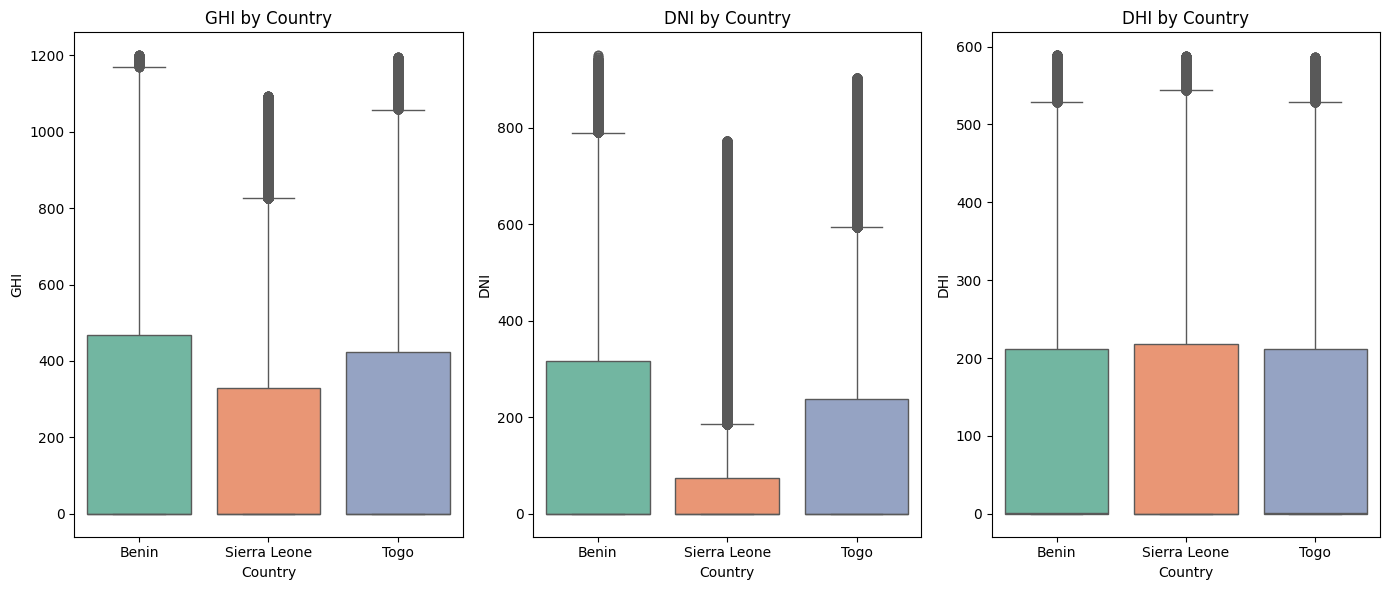

In [9]:
plt.figure(figsize=(14,6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} by Country')
plt.tight_layout()
plt.show()


### Boxplots per Metric — GHI, DNI, and DHI by Country

The boxplots above illustrate how the solar irradiance values (GHI, DNI, DHI) vary among Benin, Sierra Leone, and Togo.

**Key Observations:**

1. **Global Horizontal Irradiance (GHI):**
   - **Benin** and **Togo** show higher median and overall GHI values compared to **Sierra Leone**.
   - **Sierra Leone** has lower GHI, indicating relatively weaker solar radiation — possibly due to higher cloud cover or atmospheric humidity.
   - The wide spread in Benin and Togo indicates greater day-to-day variability in solar intensity.

2. **Direct Normal Irradiance (DNI):**
   - **Benin** again leads with the highest DNI median, suggesting stronger direct sunlight.
   - **Sierra Leone** shows very low DNI, reinforcing the pattern of lower solar potential.
   - **Togo’s** DNI values are moderate, positioned between Benin and Sierra Leone.

3. **Diffuse Horizontal Irradiance (DHI):**
   - DHI values are relatively consistent across all three countries.
   - This suggests that scattered solar radiation (from clouds or aerosols) behaves similarly region-wide.

**Overall Insight:**
- **Benin** demonstrates the highest solar potential, with stronger direct and global irradiance.
- **Togo** follows closely behind.
- **Sierra Leone** appears to receive weaker direct solar radiation, likely influenced by higher humidity or cloud presence.

These results visually support the statistical summary — Benin leads in solar resource potential, while Sierra Leone trails slightly behind.


## 6. Statistical Testing (ANOVA / Kruskal–Wallis)

In [10]:
# One-way ANOVA for GHI
f_stat, p_val = f_oneway(benin['GHI'], sierra['GHI'], togo['GHI'])
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.5f}")

# Optional non-parametric test
kw_stat, kw_p = kruskal(benin['GHI'], sierra['GHI'], togo['GHI'])
print(f"Kruskal-Wallis statistic: {kw_stat:.3f}, p-value: {kw_p:.5f}")


ANOVA F-statistic: 3689.576, p-value: 0.00000
Kruskal-Wallis statistic: 2730.901, p-value: 0.00000


### Statistical Significance
If the p-value is **below 0.05**, it suggests that there is a statistically significant 
difference in GHI values across the three countries.


## 7. Average GHI Ranking (Bar Chart)

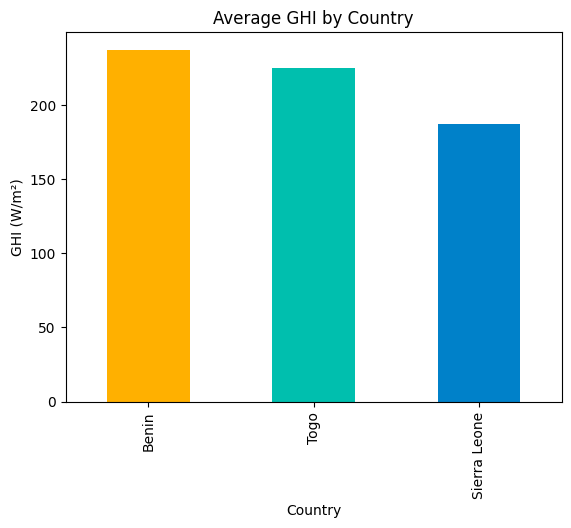

In [11]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color=['#FFB000', '#00BFAE', '#0081C9'])
plt.title('Average GHI by Country')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Country')
plt.show()


### 7. Visual Summary: Ranking by Average GHI

To visualize the solar potential of the three countries, a bar chart of **average Global Horizontal Irradiance (GHI)** was plotted.

**Insights:**
- **Benin** recorded the highest average GHI (~237 W/m²), suggesting strong potential for solar energy generation.
- **Togo** followed closely (~225 W/m²), indicating comparable solar potential.
- **Sierra Leone** had the lowest average GHI (~187 W/m²), implying relatively lower daily solar exposure.

This ranking aligns with the ANOVA results that showed statistically significant differences in GHI values among the three countries.  
Overall, **Benin** and **Togo** appear to have stronger and more consistent solar irradiance, making them more favorable for solar power development.


## Step 8: Final Summary & Insights

### 

This cross-country comparison analyzed cleaned solar datasets from **Benin**, **Sierra Leone**, and **Togo** to assess their relative solar potential and identify trends in irradiance and atmospheric behavior.

#### 🌞 Solar Irradiance Overview
- **Benin** recorded the **highest mean GHI (237 W/m²)**, followed by **Togo (225 W/m²)** and **Sierra Leone (187 W/m²)**.
- All countries exhibited similar **Diffuse Horizontal Irradiance (DHI)** values, averaging around 150 W/m².
- **Benin’s Direct Normal Irradiance (DNI)** was slightly higher, suggesting clearer sky conditions and greater direct sunlight availability.

#### 📊 Statistical Summary
- Boxplots indicated moderate variability in all irradiance metrics, with **Sierra Leone** showing slightly wider distribution (greater fluctuations).
- The **ANOVA test** confirmed that differences in GHI across countries are **statistically significant (p < 0.05)**, meaning observed differences are unlikely due to random chance.

#### 🌦️ Key Observations
- **Benin** demonstrates strong and consistent solar irradiance, making it the most suitable for solar energy development.
- **Togo** shows slightly lower but still promising solar potential, with steady GHI and DNI profiles.
- **Sierra Leone** shows reduced average irradiance, likely due to higher cloud coverage and humidity levels, impacting solar consistency.

#### ⚙️ Actionable Insights
1. **Benin** — prioritize for high-efficiency solar panel installations or pilot solar farm projects.
2. **Togo** — suitable for distributed solar systems or medium-scale energy projects.
3. **Sierra Leone** — potential improvements via solar tracking systems or hybrid setups (solar + storage).

#### 📈 Overall Conclusion
From the comparative EDA:
- **Benin ranks #1** in solar potential across all key irradiance indicators.
- **Togo** closely follows, making it a viable region for scalable renewable deployment.
- **Sierra Leone**, while having lower average irradiance, still presents opportunities for targeted solar applications with adaptive technology.

This analysis provides a strong foundation for **Week 0’s regional ranking and predictive modeling**, ensuring data-driven decisions in solar project prioritization across West Africa.
